# Mitigating Noise on Real Quantum Computers

In [1]:
from qiskit import *
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
from qiskit.tools.visualization import plot_histogram 
from qiskit.tools.monitor import job_monitor
%matplotlib inline

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2],[0,1,2])

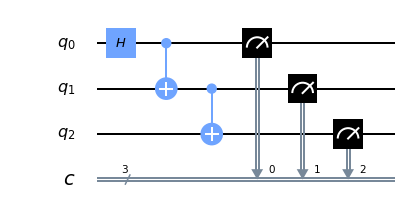

In [3]:
circuit.draw(output='mpl')

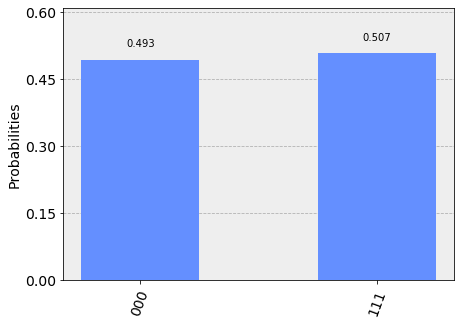

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts(circuit)
plot_histogram(counts)

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [6]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

5dbae1bd3a2e2500187c70c2
Job Status: job has successfully run


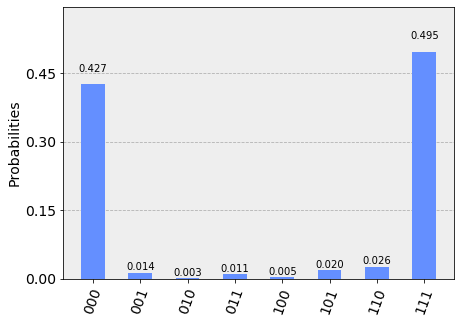

In [7]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [8]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

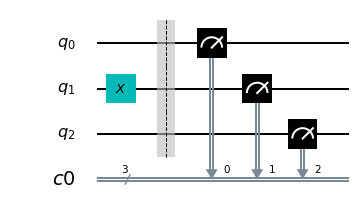

In [9]:
cal_circuits[2].draw(output='mpl')

In [10]:
len(cal_circuits)

8

In [11]:
cal_job = execute(cal_circuits, 
                 backend = device,
                 shots = 1024,
                 optimization_level = 0
                 )
print(cal_job.job_id())
job_monitor(cal_job)
cal_result = cal_job.result()

5dbae421390601001890ad69
Job Status: job has successfully run


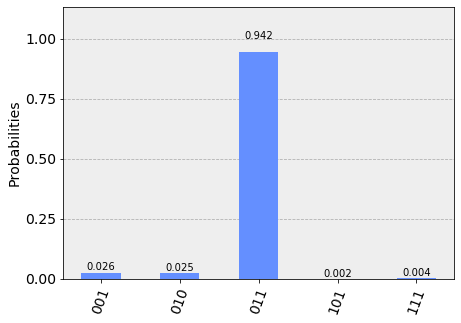

In [12]:
plot_histogram(
    cal_result.get_counts(cal_circuits[3])
)

In [13]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels)

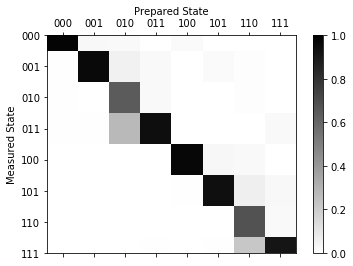

In [14]:
meas_fitter.plot_calibration()

In [15]:
meas_filter = meas_fitter.filter 

In [16]:
mitigated_result = meas_filter.apply(device_result)

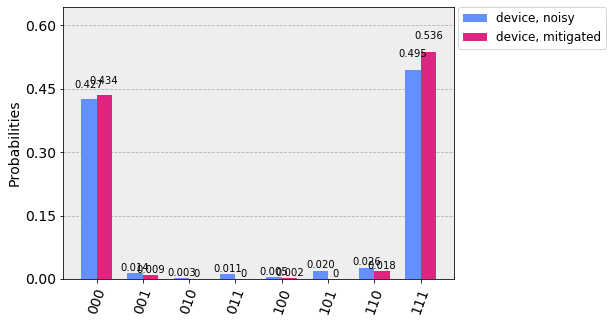

In [17]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

In [18]:
nqubits = 3
circuit2 = QuantumCircuit(nqubits, nqubits)
circuit2.x(0)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.cx(1, 2)
circuit2.measure([0,1,2],[0,1,2])

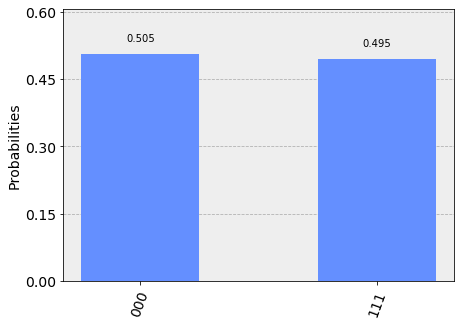

In [19]:
plot_histogram(
             execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2)

)

In [20]:
device_counts2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

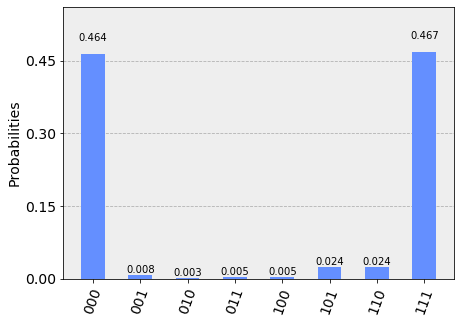

In [21]:
plot_histogram(device_counts2)

In [22]:
device_mitigated_counts2 = meas_filter.apply(device_counts2)

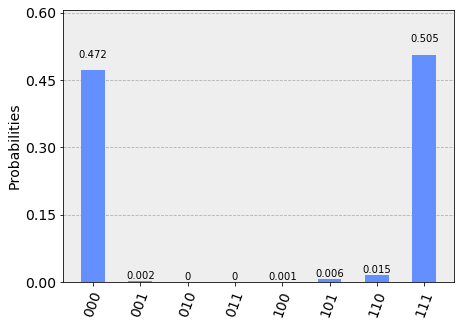

In [23]:
plot_histogram(device_mitigated_counts2)